In [37]:
import pandas as pd
import numpy as np
import json
from statistics import mean
from matplotlib import pyplot as plt

In [10]:
with open('goodreads_reviews_children.json') as f:
    lines=f.read().splitlines()

In [11]:
data_inter=pd.DataFrame(lines)
data_inter.columns=['json_element']

In [12]:
data_inter

,json_element
0,"{""user_id"": ""8842281e1d1347389f2ab93d60773d4d""..."
1,"{""user_id"": ""8842281e1d1347389f2ab93d60773d4d""..."
2,"{""user_id"": ""8842281e1d1347389f2ab93d60773d4d""..."
3,"{""user_id"": ""8842281e1d1347389f2ab93d60773d4d""..."
4,"{""user_id"": ""8842281e1d1347389f2ab93d60773d4d""..."
...,...
734635,"{""user_id"": ""480ac8b4df39533a6c7fe6ae109aa56a""..."
734636,"{""user_id"": ""afcd096765a8c354be0706ab1324999b""..."
734637,"{""user_id"": ""d94c83867337514c94738b57a1d19677""..."
734638,"{""user_id"": ""48a10d546ba07520ce194dc18e687be4""..."


In [13]:
data_inter['json_element'].apply(json.loads)

0         {'user_id': '8842281e1d1347389f2ab93d60773d4d'...
1         {'user_id': '8842281e1d1347389f2ab93d60773d4d'...
2         {'user_id': '8842281e1d1347389f2ab93d60773d4d'...
3         {'user_id': '8842281e1d1347389f2ab93d60773d4d'...
4         {'user_id': '8842281e1d1347389f2ab93d60773d4d'...
                                ...                        
734635    {'user_id': '480ac8b4df39533a6c7fe6ae109aa56a'...
734636    {'user_id': 'afcd096765a8c354be0706ab1324999b'...
734637    {'user_id': 'd94c83867337514c94738b57a1d19677'...
734638    {'user_id': '48a10d546ba07520ce194dc18e687be4'...
734639    {'user_id': 'da6f9516279ed671027308abd21318bd'...
Name: json_element, Length: 734640, dtype: object

In [14]:
data=pd.json_normalize(data_inter['json_element'].apply(json.loads))

In [16]:
data.columns

Index(['user_id', 'book_id', 'review_id', 'rating', 'review_text',
       'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes',
       'n_comments'],
      dtype='object')

In [17]:
reviews_data=data[['book_id','rating','review_text']]

In [18]:
reviews_data.shape

(734640, 3)

In [19]:
reviews_data['book_id'].value_counts()

3636        6156
5           4696
11387515    4499
157993      3114
78411       1999
            ... 
5948668        1
10893482       1
19524892       1
13641718       1
32309710       1
Name: book_id, Length: 123946, dtype: int64

In [20]:
reviews_data.isnull().sum()

book_id        0
rating         0
review_text    0
dtype: int64

In [21]:
books_ids=reviews_data['book_id']

In [34]:
def prepBookGroup(bookid):
    book_grp=reviews_data[reviews_data['book_id']=='3636']
    rating_avg=book_grp['rating'].mean()
    return book_grp,rating_avg

In [35]:
book_grp,rating_avg=prepBookGroup('3636')

In [44]:
rating_map=book_grp['rating'].value_counts()

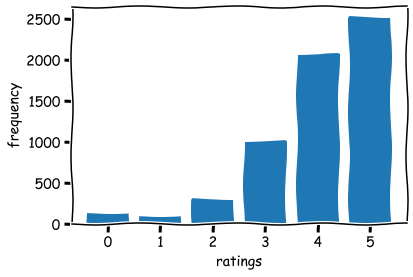

In [48]:
with plt.xkcd():
    plt.bar(list(rating_map.index),list(rating_map.values))
    plt.xlabel('ratings')
    plt.ylabel('frequency')
    plt.show()